# RLC Circuit-Nonlinear Fits

This notebook is used for analysis of the IOLab data for lab T1-RLC, PHYSICS 5BL.

In [5]:
import numpy as np
import scipy.optimize as opt
from scipy.interpolate import interp1d
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': '16'})

# Expt 1b: Series

## Data loading and interpolation

In [2]:
# check the data and headers
file = open('expt1b-series.csv', 'r')
print(file.read())

Time (s),A1 (V),A2 (V)
0.004999999888241291,0,0
0.009999999776482582,0,0
0.014999999664723873,0,0
0.019999999552965164,0,0
0.02500000037252903,0,0
0.029999999329447746,0,0
0.03500000014901161,0,0
0.03999999910593033,0,0
0.04500000178813934,0,0
0.05000000074505806,0,0
0.054999999701976776,0,0
0.05999999865889549,0,0
0.06499999761581421,0,0
0.07000000029802322,0,0
0.07500000298023224,0,0
0.07999999821186066,0,0
0.08500000089406967,0,0
0.09000000357627869,0,0
0.0949999988079071,0,0
0.10000000149011612,0,0
0.10499999672174454,0,0
0.10999999940395355,0,0
0.11500000208616257,0,0
0.11999999731779099,0,0
0.125,0,0
0.12999999523162842,0,0
0.13500000536441803,0,0
0.14000000059604645,0,0
0.14499999582767487,0,0
0.15000000596046448,0,0
0.1550000011920929,0,0
0.1599999964237213,0,0
0.16500000655651093,0,0
0.17000000178813934,0,0
0.17499999701976776,0,0
0.18000000715255737,0,0
0.1850000023841858,0,0
0.1899999976158142,0,0
0.19499999284744263,0,0
0.20000000298023224,0,0
0.20499999821186066,0,0
0.2099

In [3]:
# Load IOLab data--no interpolation needed here.
t, a1, a2 = np.loadtxt('expt1b-series.csv', delimiter=",", skiprows=1, usecols=(0,1,2), unpack=True)

In [4]:
x_raw = t
a1_modif = np.array([max(a, 1e-5) for a in a1])
a2_modif = np.array([max(a, 1e-5) for a in a2])
y_raw = a2_modif / 2

In [5]:
print(np.where(np.diff(y_raw) < -0.01))
print(np.where(y_raw < 1e-3))

(array([ 934,  935,  936,  937,  938,  939,  940,  941,  942,  943,  944,
        945,  946,  947,  948,  949,  950,  951,  952,  953,  954,  955,
        956,  957,  958,  959,  960,  961,  962,  963,  964, 2214, 2215,
       2216, 2217, 2218, 2219, 2220, 2221, 2222, 2223, 2224, 2225, 2226,
       2227, 2228, 2229, 2230, 2231, 2232, 2233, 2234, 2235, 2236, 2237,
       2238, 2239, 2240, 2241, 2242, 2243, 2244, 3692, 3693, 3694, 3695,
       3696, 3697, 3698, 3699, 3700, 3701, 3702, 3703, 3704, 3705, 3706,
       3707, 3708, 3709, 3710, 3711, 3712, 3713, 3714, 3715, 3716, 3717,
       3718, 3719, 3720, 3721, 3722], dtype=int64),)
(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   

11.074999809265137 14.774999618530273


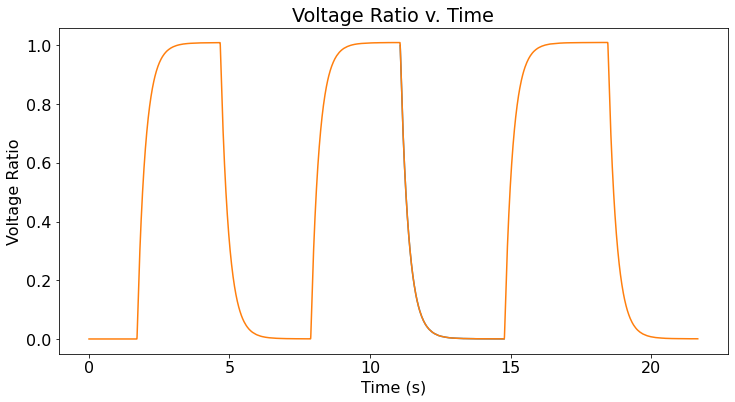

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(x_raw[2214:2954], y_raw[2214:2954])
plt.plot(x_raw[:], y_raw[:])
plt.xlabel('Time (s)')
plt.ylabel('Voltage Ratio')
plt.title('Voltage Ratio v. Time')
print(x_raw[2214], x_raw[2954])

In [7]:
x_data, y_data = x_raw[2214:2954], y_raw[2214:2954]
x_data = x_data - np.ones((len(x_data))) * x_data[0]

## Nonlinear fits
From the theory, we define the model $\frac{V_C}{V_0}=Ae^{-t/B}$ for a nonlinear fit, where $B$ is the RC time constant.

### Define the model:

In [8]:
def ratio_model(time, A, tau):
    """Parameters are A, tau;
    independent variable is time.
    Returns the voltage ratio."""
    return A * np.exp(-time / tau)


### Choose the model and initial fit parameter values then graph:


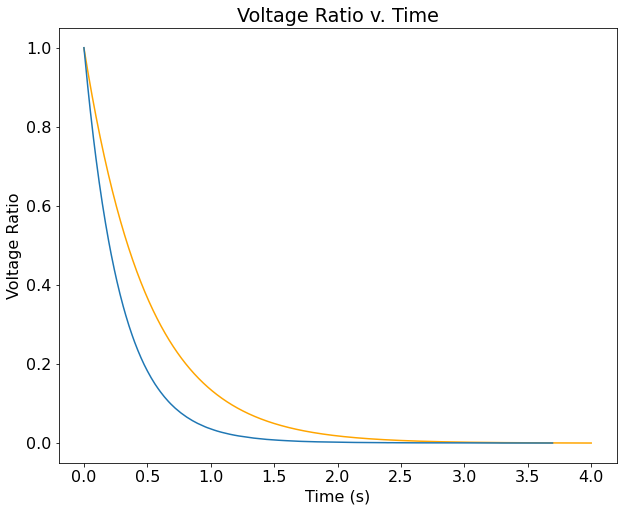

In [9]:
plt.figure(figsize=(10, 8))

# Initial guess values of fit parameters
Ainit, Tauinit = [1, 0.5]

# Graph
times = np.linspace(0, 4, 1000)
plt.plot(times, ratio_model(times, Ainit, Tauinit), color='orange')
plt.plot(x_data, y_data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage Ratio')
plt.title('Voltage Ratio v. Time')
plt.show()

## Perform the fit then plot

In [10]:
# Perform the fit
start_pars = [Ainit, Tauinit]
pars, cov = opt.curve_fit(ratio_model, x_data, y_data, p0=start_pars)

[A, Tau] = pars
std_errs = np.sqrt(np.diag(cov))

print(np.transpose([pars, std_errs]))

[[9.95087865e-01 4.01540939e-04]
 [2.95219992e-01 1.69900953e-04]]


In [11]:
# Values predicted from fit
ypred = ratio_model(times, A, Tau)

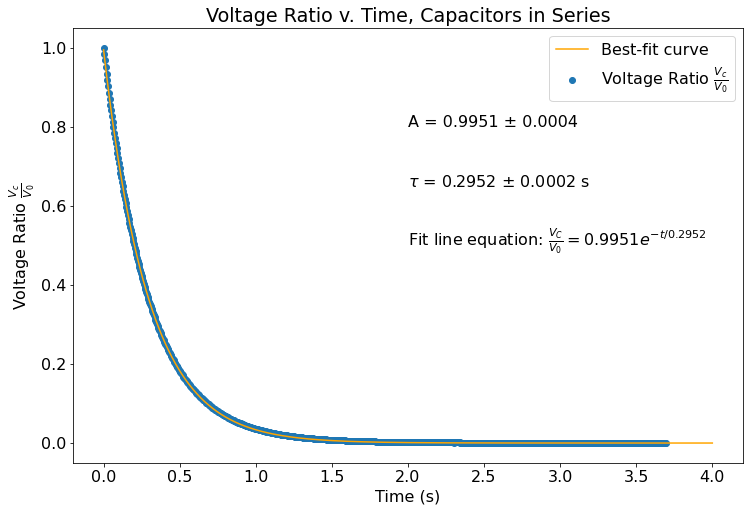

In [12]:
## Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(12, 8))

# Data and fit
plt.scatter(x_data, y_data, label='Voltage Ratio $\\frac{V_c}{V_0}$')
plt.plot(times, ypred, color='orange', label='Best-fit curve')

# Axes label and title
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage Ratio $\\frac{V_c}{V_0}$')
plt.title('Voltage Ratio v. Time, Capacitors in Series')



# Text
plt.text(2, 0.8, "A = %5.4f \u00b1 %5.4f" % (pars[0], std_errs[0]))
plt.text(2, 0.65, "$\\tau$ = %5.4f \u00b1 %5.4f s" % (pars[1], std_errs[1]))
plt.text(2, 0.5, "Fit line equation: $\\frac{V_C}{V_0}=%5.4fe^{-t/%5.4f}$" %
         (pars[0], pars[1]))

plt.savefig('fig-1b-series.png')

# Expt 1b: Parallel

In [13]:
# check the data and headers
file = open('expt1b-parallel.csv', 'r')
print(file.read())

Time (s),A1 (V),A2 (V)
0.004999999888241291,0,0
0.009999999776482582,0,0
0.014999999664723873,0,0
0.019999999552965164,0,0
0.02500000037252903,0,0
0.029999999329447746,0,0
0.03500000014901161,0,0
0.03999999910593033,0,0
0.04500000178813934,0,0
0.05000000074505806,0,0
0.054999999701976776,0,0
0.05999999865889549,0,0
0.06499999761581421,0,0
0.07000000029802322,0,0
0.07500000298023224,0,0
0.07999999821186066,0,0
0.08500000089406967,0,0
0.09000000357627869,0,0
0.0949999988079071,0,0
0.10000000149011612,0,0
0.10499999672174454,0,0
0.10999999940395355,0,0
0.11500000208616257,0,0
0.11999999731779099,0,0
0.125,0,0
0.12999999523162842,0,0
0.13500000536441803,0,0
0.14000000059604645,0,0
0.14499999582767487,0,0
0.15000000596046448,0,0
0.1550000011920929,0,0
0.1599999964237213,0,0
0.16500000655651093,0,0
0.17000000178813934,0,0
0.17499999701976776,0,0
0.18000000715255737,0,0
0.1850000023841858,0,0
0.1899999976158142,0,0
0.19499999284744263,0,0
0.20000000298023224,0,0
0.20499999821186066,0,0
0.2099

In [1]:
# Load IOLab data--no interpolation needed here.
t, a1, a2 = np.loadtxt('expt1b-parallel.csv', delimiter=",", skiprows=1, usecols=(0,1,2), unpack=True)

In [2]:
x_raw = t
a1_modif = np.array([max(a, 1e-5) for a in a1])
a2_modif = np.array([max(a, 1e-5) for a in a2])
y_raw = a2_modif / 2

In [3]:
# print(np.where(np.diff(y_raw) < -3e-3))
print(np.where(y_raw < 2e-3))

(array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  

11.074999809265137 20.739999771118164


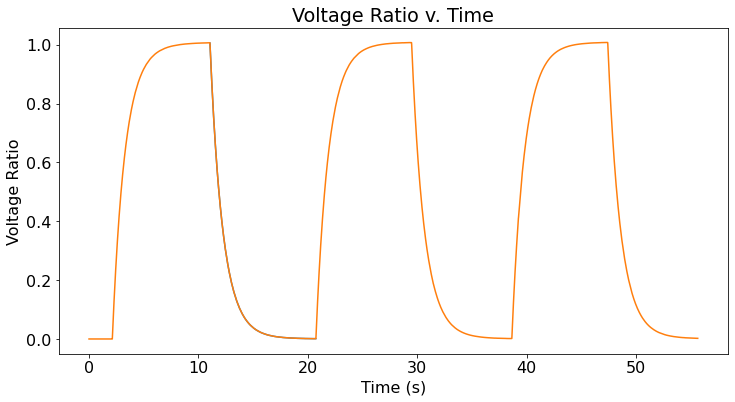

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(x_raw[2211:4147], y_raw[2211:4147])
plt.plot(x_raw[:], y_raw[:])
plt.xlabel('Time (s)')
plt.ylabel('Voltage Ratio')
plt.title('Voltage Ratio v. Time')
print(x_raw[2214], x_raw[4147])

In [ ]:
## x_data, y_data = x_raw[2211:4147], y_raw[2211:4147]
x_data = x_data - np.ones((len(x_data))) * x_data[0]

## Nonlinear fits
From the theory, we define the model $\frac{V_C}{V_0}=Ae^{-t/B}$ for a nonlinear fit, where $B$ is the RC time constant.

### Define the model:

In [19]:
def ratio_model(time, A, tau):
    """Parameters are A, tau;
    independent variable is time.
    Returns the voltage ratio."""
    return A * np.exp(-time / tau)


### Choose the model and initial fit parameter values then graph:


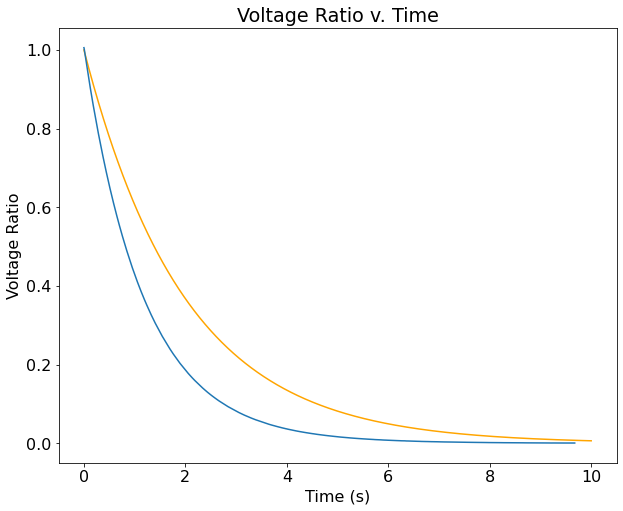

In [20]:
plt.figure(figsize=(10, 8))

# Initial guess values of fit parameters
Ainit, Tauinit = [1, 2]

# Graph
times = np.linspace(0, 10, 2500)
plt.plot(times, ratio_model(times, Ainit, Tauinit), color='orange')
plt.plot(x_data, y_data)
plt.xlabel('Time (s)')
plt.ylabel('Voltage Ratio')
plt.title('Voltage Ratio v. Time')
plt.show()

## Perform the fit then plot

In [21]:
# Perform the fit
start_pars = [Ainit, Tauinit]
pars, cov = opt.curve_fit(ratio_model, x_data, y_data, p0=start_pars)

[A, Tau] = pars
std_errs = np.sqrt(np.diag(cov))

print(np.transpose([pars, std_errs]))

[[9.99948401e-01 2.11290601e-04]
 [1.19132686e+00 3.56748350e-04]]


In [22]:
# Values predicted from fit
ypred = ratio_model(times, A, Tau)

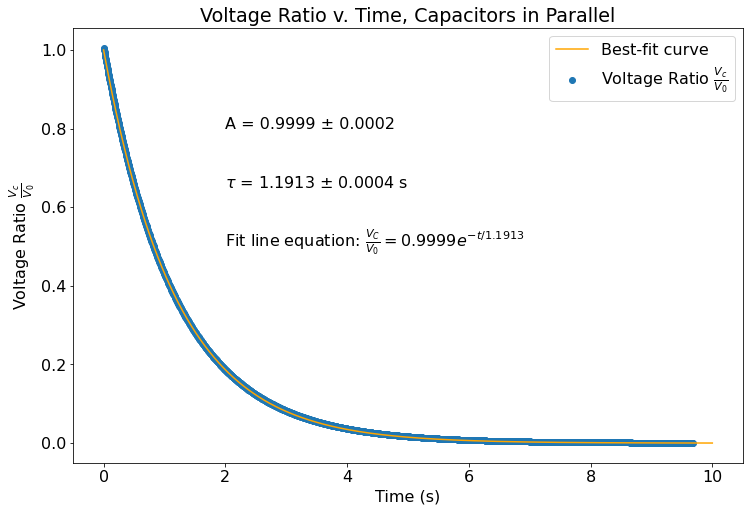

In [23]:
## Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(12, 8))

# Data and fit
plt.scatter(x_data, y_data, label='Voltage Ratio $\\frac{V_c}{V_0}$')
plt.plot(times, ypred, color='orange', label='Best-fit curve')

# Axes label and title
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Voltage Ratio $\\frac{V_c}{V_0}$')
plt.title('Voltage Ratio v. Time, Capacitors in Parallel')



# Text
plt.text(2, 0.8, "A = %5.4f \u00b1 %5.4f" % (pars[0], std_errs[0]))
plt.text(2, 0.65, "$\\tau$ = %5.4f \u00b1 %5.4f s" % (pars[1], std_errs[1]))
plt.text(2, 0.5, "Fit line equation: $\\frac{V_C}{V_0}=%5.4fe^{-t/%5.4f}$" %
         (pars[0], pars[1]))

plt.savefig('fig-1b-parallel.png')

# Expt 2d: 56/56 Parallel

In [7]:
# check the data and headers
file = open('expt2d-5656.csv', 'r')
print(file.read())

Time (s),Voltage (mV)
0.00041666667675599456,-0.013605441898107529
0.0008333333535119891,-0.013605441898107529
0.0012499999720603228,-0.013605441898107529
0.0016666667070239782,-0.013605441898107529
0.0020833334419876337,-0.013605441898107529
0.0024999999441206455,-0.013605441898107529
0.002916666679084301,-0.013605441898107529
0.0033333334140479565,-0.013605441898107529
0.0037499999161809683,-0.013360043056309223
0.004166666883975267,-0.013325643725693226
0.004583333153277636,-0.013101266697049141
0.004999999888241291,-0.013082155957818031
0.0054166666232049465,-0.013582509011030197
0.005833333358168602,-0.013369598425924778
0.0062500000931322575,-0.013578686863183975
0.006666666828095913,-0.013605441898107529
0.007083333563059568,-0.013342843391001225
0.007499999832361937,-0.013605441898107529
0.007916666567325592,-0.013605441898107529
0.008333333767950535,-0.013342843391001225
0.008750000037252903,-0.013605441898107529
0.009166666306555271,-0.013605441898107529
0.009583333507180214,

In [8]:
# Load IOLab data--no interpolation needed here.
t, hg = np.loadtxt('expt2d-5656.csv', delimiter=",", skiprows=1, usecols=(0,1), unpack=True)

In [9]:
x_raw = t
y_raw = hg

In [10]:
print(np.where(y_raw > 0.15))
print(np.where(y_raw < 2e-3))

(array([ 3968,  3969,  3970,  3971,  3972,  3973,  3974,  3975,  3976,
        3977,  3978,  3979,  3980,  3981,  3982,  3983,  3984,  3985,
        3986,  3987,  3988,  3989,  3990,  3991,  3992,  3993,  3994,
        3995,  3996,  3997,  3998,  3999,  4000,  4001,  4002,  4003,
        4004,  4005,  4006,  4007,  4008,  4009,  4010,  4011,  4012,
        4013,  4014,  4015,  4016,  4017,  4018,  4019,  4020,  4021,
        4022,  4023,  4024,  4025,  4026,  4027,  4028,  4029,  4030,
        4031,  4032,  4033,  4034,  4035,  4036,  4037,  4038,  4039,
        4040,  4041,  4042,  4043,  4044,  4045,  4046,  4047,  4048,
        4049,  4050,  4051,  4052,  4053,  4054,  4055,  4056,  4057,
        4058,  4059,  4060,  4061,  4062,  4063,  4064,  4065,  4066,
        4067,  4068,  4069,  4070,  4071,  4072,  4073,  4074,  4075,
        4076,  4077,  4078,  4079,  4080,  4081,  4082,  4083,  4084,
        4085,  4086,  4087,  4088,  4089,  4090,  4091,  4092,  4093,
        4094,  4095

1.658750057220459 3.333750009536743


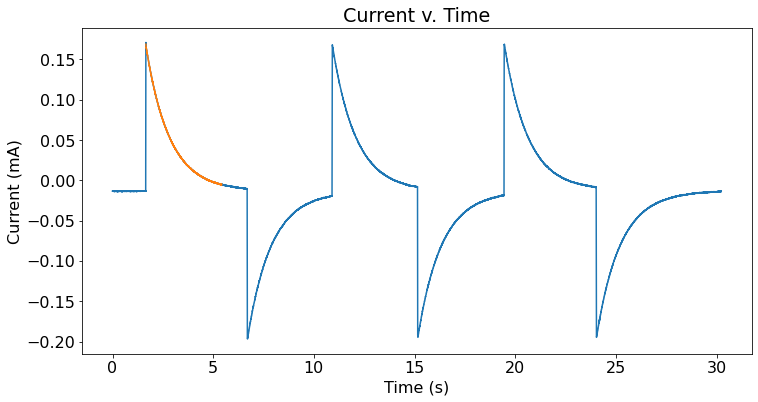

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(x_raw[:], y_raw[:])
plt.plot(x_raw[3980:13000], y_raw[3980:13000])

plt.xlabel('Time (s)')
plt.ylabel('Current (mA)')
plt.title('Current v. Time')
print(x_raw[3980], x_raw[8000])

In [13]:
x_data, y_data = x_raw[3980:8000], y_raw[3980:8000]
x_data = x_data - np.ones((len(x_data))) * x_data[0]

## Nonlinear fits
From the theory, we define the model $V_C=Ae^{-(\alpha-b)t}+Be^{-(\alpha+b)t}$ for a nonlinear fit.

### Define the model:

In [14]:
def four_param_current_model(time, A, B, a, b):
    """Parameters are A, B, a, b;
    independent variable is time.
    Returns the current."""
    return A * np.exp(-(a-b)*time) + B * np.exp(-(a+b)*time)

def current_model(time, A, D):
    """Parameters are A, D;
    independent variable is time.
    Returns the current."""
    return A * np.exp(-D*time)


### Choose the model and initial fit parameter values then graph:


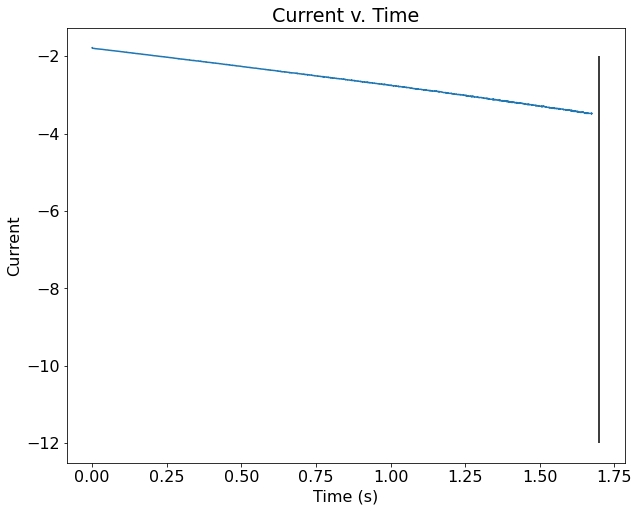

In [15]:
plt.figure(figsize=(10, 8))

# Initial guess values of fit parameters
# Ainit, Binit, ainit, binit = [0.15, 0.15, 50000, 50000]
Ainit, Dinit = [0.15, 1]

# Graph
times = np.linspace(0, 5, 2500)
# plt.plot(times, current_model(times, Ainit, Dinit), color='orange')
plt.plot(x_data, np.log(y_data))
plt.xlabel('Time (s)')
plt.ylabel('Current')
plt.title('Current v. Time')
plt.vlines(1.7,-12, -2)
# plt.show()
plt.savefig('fig-cutoff-5656.png')

## Perform the fit then plot

In [16]:
# Perform the fit
# start_pars = [Ainit, Binit, ainit, binit]
start_pars = [Ainit, Dinit]
pars, cov = opt.curve_fit(current_model, x_data, y_data, p0=start_pars)

[A, D] = pars
std_errs = np.sqrt(np.diag(cov))

print(np.transpose([pars, std_errs]))

[[1.68466695e-01 4.06835407e-05]
 [9.81566591e-01 4.11828515e-04]]


In [17]:
# Values predicted from fit
# ypred = current_model(times, A, B, a, b)
ypred = current_model(times, A, D)

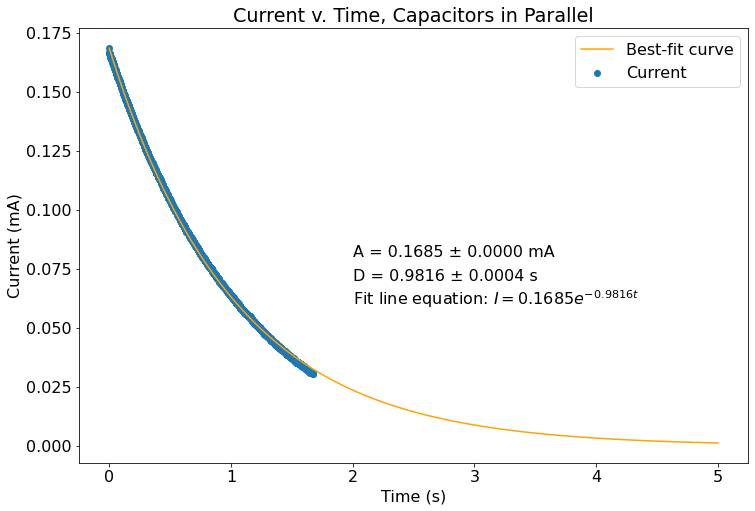

In [18]:
## Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(12, 8))

# Data and fit
plt.scatter(x_data, y_data, label='Current')
plt.plot(times, ypred, color='orange', label='Best-fit curve')

# Axes label and title
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Current (mA)')
plt.title('Current v. Time, Capacitors in Parallel')



# Text
plt.text(2, 0.08, "A = %5.4f \u00b1 %5.4f mA" % (pars[0], std_errs[0]))
plt.text(2, 0.07, "D = %5.4f \u00b1 %5.4f s" % (pars[1], std_errs[1]))
# plt.text(2, 0.06, "$\\alpha$ = %5.4f \u00b1 %5.4f" % (pars[2], std_errs[2]))
# plt.text(2, 0.05, "b = %5.4f \u00b1 %5.4f s" % (pars[3], std_errs[3]))
# plt.text(2, 0.04, "Fit line equation: $I=%5.4fe^{-%5.4ft}+%5.4fe^{-%5.4ft}$" %
#          (pars[0], pars[2]-pars[3], pars[1], pars[2]+pars[3]))
plt.text(2, 0.06, "Fit line equation: $I=%5.4fe^{-%5.4ft}$" %
         (pars[0], pars[1]))


plt.savefig('fig-2d-5656.png')

# Expt 2d: 56/56/22/22 Parallel

In [68]:
# check the data and headers
file = open('expt2d-56562222.csv', 'r')
print(file.read())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
# Load IOLab data--no interpolation needed here.
t, hg = np.loadtxt('expt2d-56562222.csv', delimiter=",", skiprows=1, usecols=(0,1), unpack=True)

In [20]:
x_raw = t
y_raw = hg

In [21]:
print(np.where(y_raw > 0.17))
print(np.where(y_raw < 2e-3))

(array([ 2876,  2877,  2878,  2879,  2880,  2881,  2882,  2883,  2884,
        2885,  2886,  2887,  2888,  2889,  2890,  2891,  2892,  2893,
        2894,  2895,  2896,  2897,  2898,  2899,  2900,  2901,  2902,
        2903,  2904,  2905,  2906,  2907,  2908,  2909,  2910,  2911,
        2912,  2913,  2914,  2915,  2916,  2917,  2918,  2919,  2920,
        2921,  2922,  2923,  2924,  2925,  2926,  2927,  2928,  2929,
        2930,  2931,  2932,  2933,  2934,  2935,  2936,  2937,  2938,
        2939,  2940,  2941,  2942,  2943,  2944,  2945,  2946,  2947,
        2948,  2949,  2950,  2951,  2952,  2953,  2954,  2955,  2956,
        2957,  2958,  2959,  2960,  2961,  2962,  2963,  2964,  2965,
        2966,  2967,  2968,  2969,  2970,  2971,  2972,  2973,  2974,
        2975,  2976,  2977,  2978,  2979,  2980,  2981,  2982,  2983,
        2984,  2985,  2986,  2987,  2988,  2989,  2990,  2991,  2992,
        2993,  2994,  2995,  2996,  2997,  2998,  2999,  3000,  3001,
        3002,  3003

13.633749961853027 16.667083740234375


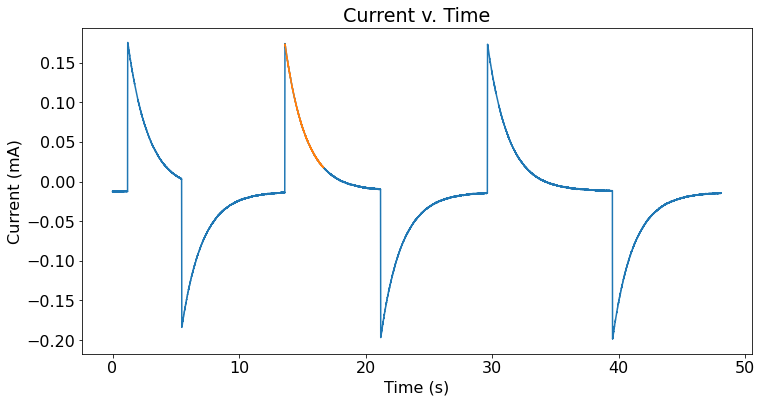

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(x_raw[:], y_raw[:])
plt.plot(x_raw[32720:40000], y_raw[32720:40000])

plt.xlabel('Time (s)')
plt.ylabel('Current (mA)')
plt.title('Current v. Time')
print(x_raw[32720], x_raw[40000])

In [29]:
x_data, y_data = x_raw[32720:39000], y_raw[32720:39000]
x_data = x_data - np.ones((len(x_data))) * x_data[0]

## Nonlinear fits
From the theory, we define the model $V_C=Ae^{-(\alpha-b)t}+Be^{-(\alpha+b)t}$ for a nonlinear fit.

### Define the model:

In [30]:
def four_param_current_model(time, A, B, a, b):
    """Parameters are A, B, a, b;
    independent variable is time.
    Returns the current."""
    return A * np.exp(-(a-b)*time) + B * np.exp(-(a+b)*time)

def current_model(time, A, D):
    """Parameters are A, D;
    independent variable is time.
    Returns the current."""
    return A * np.exp(-D*time)


### Choose the model and initial fit parameter values then graph:


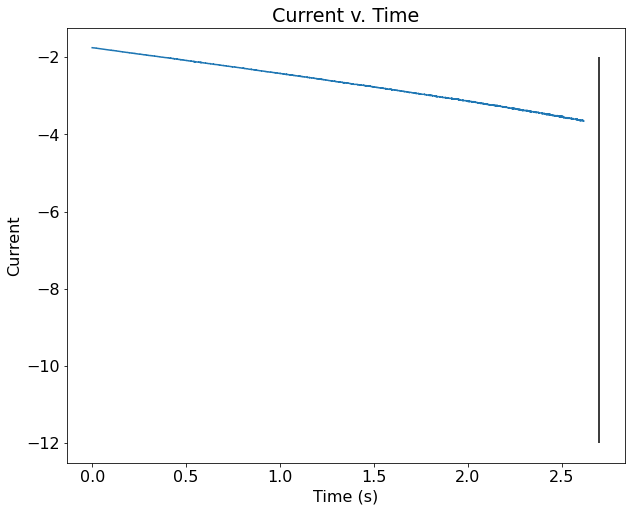

In [31]:
plt.figure(figsize=(10, 8))

# Initial guess values of fit parameters
# Ainit, Binit, ainit, binit = [0.15, 0.15, 50000, 50000]
Ainit, Dinit = [0.15, 1]

times = np.linspace(0, 5, 2500)
# plt.plot(times, current_model(times, Ainit, Dinit), color='orange')
plt.plot(x_data, np.log(y_data))
plt.xlabel('Time (s)')
plt.ylabel('Current')
plt.title('Current v. Time')
plt.vlines(2.7,-12, -2)
plt.savefig('fig-cutoff-56562222.png')

## Perform the fit then plot

In [32]:
# Perform the fit
# start_pars = [Ainit, Binit, ainit, binit]
start_pars = [Ainit, Dinit]
pars, cov = opt.curve_fit(current_model, x_data, y_data, p0=start_pars)

[A, D] = pars
std_errs = np.sqrt(np.diag(cov))

print(np.transpose([pars, std_errs]))

[[1.75364242e-01 4.01740591e-05]
 [6.93179116e-01 2.64477838e-04]]


In [33]:
# Values predicted from fit
# ypred = current_model(times, A, B, a, b)
ypred = current_model(times, A, D)

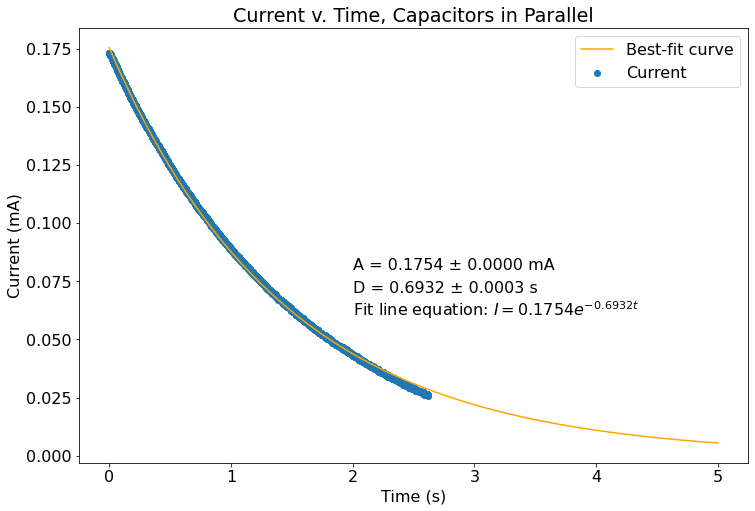

In [35]:
## Best-fit plots

# Sets figure size etc.
fig1=plt.figure(figsize=(12, 8))

# Data and fit
plt.scatter(x_data, y_data, label='Current')
plt.plot(times, ypred, color='orange', label='Best-fit curve')

# Axes label and title
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Current (mA)')
plt.title('Current v. Time, Capacitors in Parallel')



# Text
plt.text(2, 0.08, "A = %5.4f \u00b1 %5.4f mA" % (pars[0], std_errs[0]))
plt.text(2, 0.07, "D = %5.4f \u00b1 %5.4f s" % (pars[1], std_errs[1]))
# plt.text(2, 0.06, "$\\alpha$ = %5.4f \u00b1 %5.4f" % (pars[2], std_errs[2]))
# plt.text(2, 0.05, "b = %5.4f \u00b1 %5.4f s" % (pars[3], std_errs[3]))
# plt.text(2, 0.04, "Fit line equation: $I=%5.4fe^{-%5.4ft}+%5.4fe^{-%5.4ft}$" %
#          (pars[0], pars[2]-pars[3], pars[1], pars[2]+pars[3]))
plt.text(2, 0.06, "Fit line equation: $I=%5.4fe^{-%5.4ft}$" %
         (pars[0], pars[1]))


plt.savefig('fig-2d-56562222.png')